<a href="https://colab.research.google.com/github/modelz1111/colab/blob/main/0529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
nltk.download("popular")
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [9]:
import nltk
nltk.download('popular')
nltk.download('all-corpora')
nltk.download('punkt')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [4]:
ls '/content/drive/MyDrive/Colab Notebooks/22223

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [16]:
from nltk.tokenize import sent_tokenize
dataset = wordlists.raw('1.txt')
print(sent_tokenize(dataset))
print(len(sent_tokenize(dataset)))


['Baa, Baa, Black Sheep,\r\nHave you any wool?', 'Yes, I do.', 'Yes, I do, three bags full.', 'One for your mittens.', 'One for your hat.', 'One for the sweater you wear in Winter.', 'Baa, Baa, Black Sheep,\r\nHave you any wool?', 'Yes, I do.', 'Yes, I do, three bags full.']
9


In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
import nltk
from nltk.corpus import PlaintextCorpusReader

#PlaintextCorpusReader
#讀取純文字檔案，並把它們當作語料庫（corpus）來分析
corpus_root = '/content/drive/MyDrive/22223' # 請改成自己的路徑 File Path
wordlists = PlaintextCorpusReader(corpus_root, '.*') # .* => find all files, .txt => only find txt files

books = wordlists.fileids() # 回傳檔名
print(books)

['1.txt', '2.txt', '3.txt']


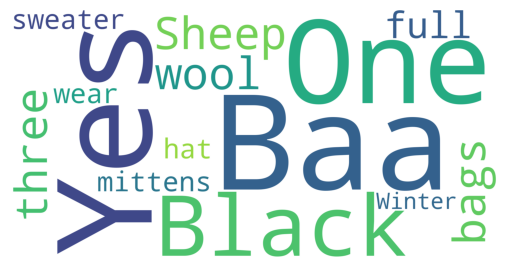

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

#讀取文本
file_text = open('/content/drive/MyDrive/22223/1.txt','r').read()


# background_color 背景顏色
# width 寬
# height 高
# margin 圖片邊緣
# max_font_size 設定文字中最大的大小是多少
# min_font_size
# max_words  文字雲顯示最大詞數
# font_path="/tmp/DFFT_C7.ttc", #設置字體

temp = WordCloud(
    background_color="white",
    width=2000,
    height=1000,
    margin= 10,
).generate(file_text)


plt.imshow(temp)
plt.axis("off")
plt.show()


# 練習

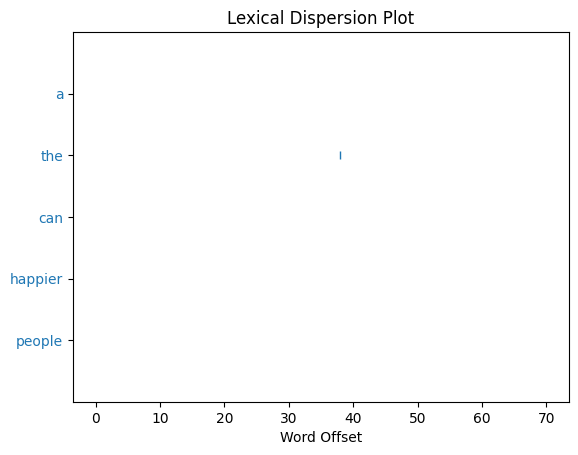

In [17]:
import nltk
testText = wordlists.words('1.txt')
single = nltk.text.Text(testText)

findList = ["a","the", "can", "happier", "people"]
single.dispersion_plot(findList)

<Axes: xlabel='Samples', ylabel='Counts'>

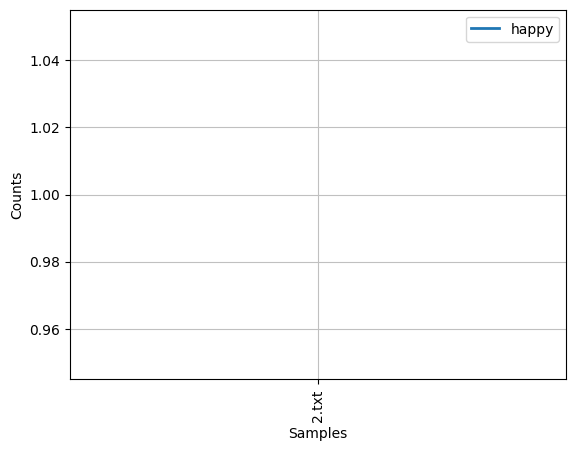

In [20]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:7]) # [:7]取至前七位字元
    for fileid in wordlists.fileids() # 取出各個文檔
    for w in wordlists.words(fileid)  # 所有文本的字詞
    for target in ['happy', 'positive', 'negative'] # 篩選字詞
    if w.lower() == target) # w.lower().startswith(target)  # 字詞 happier也能納入計算
cfd.plot()

<Axes: xlabel='Samples', ylabel='Counts'>

) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


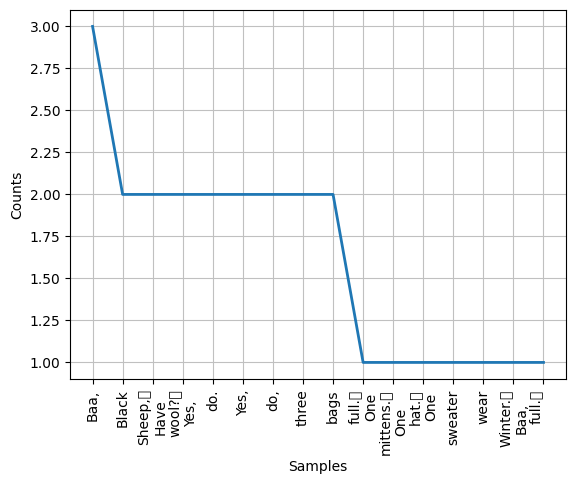

In [22]:
#分析高頻率單字

import nltk
from wordcloud import STOPWORDS

dataset = wordlists.raw('1.txt')

tokens = dataset.split(' ') #以空格斷詞
clean_tokens = tokens[:]

for token in tokens:
  if token.lower() in STOPWORDS:
    clean_tokens.remove(token)  #若有STOPWORDS,remove掉

freq = nltk.FreqDist(clean_tokens)

# for key,val in freq.items():
#  print (str(key) + ':' + str(val))
freq.plot(20,cumulative=False)